# Arvores de Decisão - Diabetes

In [ ]:
### Disponível em https://www.kaggle.com/uciml/pima-indians-diabetes-database

Diabetes

Attributes:

Pregnancies: Number of times pregnant - Gravidez

Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test - Glicose

BloodPressure: Diastolic blood pressure (mm Hg) - Pressão Arterial

SkinThickness: Triceps skin fold thickness (mm)  - Espessura do tríceps

Insulin: 2-Hour serum insulin (mu U/ml) - Insulina

BMI: Body mass index (weight in kg/(height in m)^2) - IMC

DiabetesPedigreeFunction: Diabetes pedigree function - Função que leva em conta doenças na familia

Age: Age (years)

Outcome: Class variable (0 or 1) - 0 : Não tem Diabetes, 1: Possui Diabetes

In [2]:
import pandas as pd

In [9]:
df = pd.read_csv("diabetes.csv")
df.rename(columns={"Outcome": "Class"} , inplace=True)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Class                       768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Preparação dos dados

### limpeza dos dados missing

In [13]:
len(df)

768

In [14]:
df2 = df
df2 = df2.dropna()
len(df2)

768

In [15]:
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Aplicar o algoritmo de Classificação - Árvore de Decisão

In [17]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

In [18]:
# particionar os conjuntos de treino e teste
from sklearn.model_selection import train_test_split

diabetes_data = df2.loc[:,["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin",
                       "BMI", "DiabetesPedigreeFunction", "Age"]]
diabetes_target = df2["Class"]

In [19]:
diabetes_data[:3]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32


In [20]:
diabetes_target[:3]

0    1
1    0
2    1
Name: Class, dtype: int64

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    diabetes_data, diabetes_target, test_size=0.33, random_state=42)

X_train[:3]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
464,10,115,98,0,0,24.0,1.022,34
223,7,142,60,33,190,28.8,0.687,61
393,4,116,72,12,87,22.1,0.463,37


In [22]:
print("# dados de treino = ", len(X_train))
print("# dados de teste = ", len(X_test))    

# dados de treino =  514
# dados de teste =  254


### aplicar o algoritmo de arvores de decisao

In [23]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.709


In [75]:
import sklearn.metrics as metrics

metrics.confusion_matrix(y_test, tree.predict(X_test))

array([[127,  41],
       [ 33,  53]])

### Previsao

In [38]:
import numpy as np

In [51]:
# 0 = não tem diabetes, 1 = tem diabetes

ocorrencias = [ 
#Pregnancies Glucose BloodPressure    SkinThickness Insulin    BMI    DiabetesPedigreeFunction  Age
[   3,          150,         75,             36,        0,     36.1,   0.62,                      55  ],
[   0,          90,          90,             40,        90,    30,     0.7,                      32  ],
[   1,          120,         75,             28,        70,    29,     0.5,                      27  ]
]
               
   
saida =  '{:03.1f}\t\t{:03.1f}\t{:03.1f}\t\t{:03.1f}\t\t{:03.1f}\t{:03.1f}\t\t{:03.1f}\t{:03.1f}\t{:s}'               
  
print("Pregnancies \tGlucose\tBloodPressure\tSkinThickness Insulin    BMI    DiabetesPFun    Age")
for ocorrencia in ocorrencias:
    ocorrencia = np.array(ocorrencia).reshape(1, -1) 
    classe = "Não tem diabetes" if tree.predict(ocorrencia) == 0 else "Possui Diabetes"
    #print(classe)
    print(saida.format(ocorrencia[0][0], ocorrencia[0][1], ocorrencia[0][2], ocorrencia[0][3],
                       ocorrencia[0][4], ocorrencia[0][5], ocorrencia[0][6], ocorrencia[0][7], classe))

Pregnancies 	Glucose	BloodPressure	SkinThickness Insulin    BMI    DiabetesPFun    Age
3.0		150.0	75.0		36.0		0.0	36.1		0.6	55.0	Possui Diabetes
0.0		90.0	90.0		40.0		90.0	30.0		0.7	32.0	Não tem diabetes
1.0		120.0	75.0		28.0		70.0	29.0		0.5	27.0	Não tem diabetes


### Verificando os atributos mais relevantes

Atributos mais relavantes


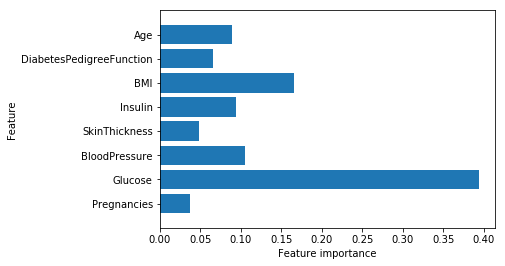

In [73]:
# mostrar os atributos mais relavantes (features)
import matplotlib.pyplot as plt
%matplotlib inline

def plot_feature_importances_cancer(model):
    columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", 
                       "BMI", "DiabetesPedigreeFunction", "Age"]
    n_features = len(columns)
    plt.barh(range(n_features), tree.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.figure(figsize=(12,10))
    print ("Atributos mais relavantes")
    plt.show()
    

plot_feature_importances_cancer(tree)

In [65]:
columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", 
                       "BMI", "DiabetesPedigreeFunction", "Age"]
dict_features =  {}
for name, feature, in zip(columns,features_importances):
    dict_features[name] = feature
dict_features

{'Age': 0.089267555239836593,
 'BMI': 0.16631871513760388,
 'BloodPressure': 0.10523598192982168,
 'DiabetesPedigreeFunction': 0.065808016466168545,
 'Glucose': 0.39394110999442356,
 'Insulin': 0.093888439155389802,
 'Pregnancies': 0.036691112268639484,
 'SkinThickness': 0.048849069808116492}

In [69]:
# ordenar
sorted(dict_features.items(), key=lambda x: -x[1])

[('Glucose', 0.39394110999442356),
 ('BMI', 0.16631871513760388),
 ('BloodPressure', 0.10523598192982168),
 ('Insulin', 0.093888439155389802),
 ('Age', 0.089267555239836593),
 ('DiabetesPedigreeFunction', 0.065808016466168545),
 ('SkinThickness', 0.048849069808116492),
 ('Pregnancies', 0.036691112268639484)]

### Analisando a árvore de decisao

In [52]:
# Class: negative, positive
Class = ["negative", "positive"]
features = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin",
                       "BMI", "DiabetesPedigreeFunction", "Age"]
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["negative","positive",],
                feature_names=features, impurity=False, filled=True)

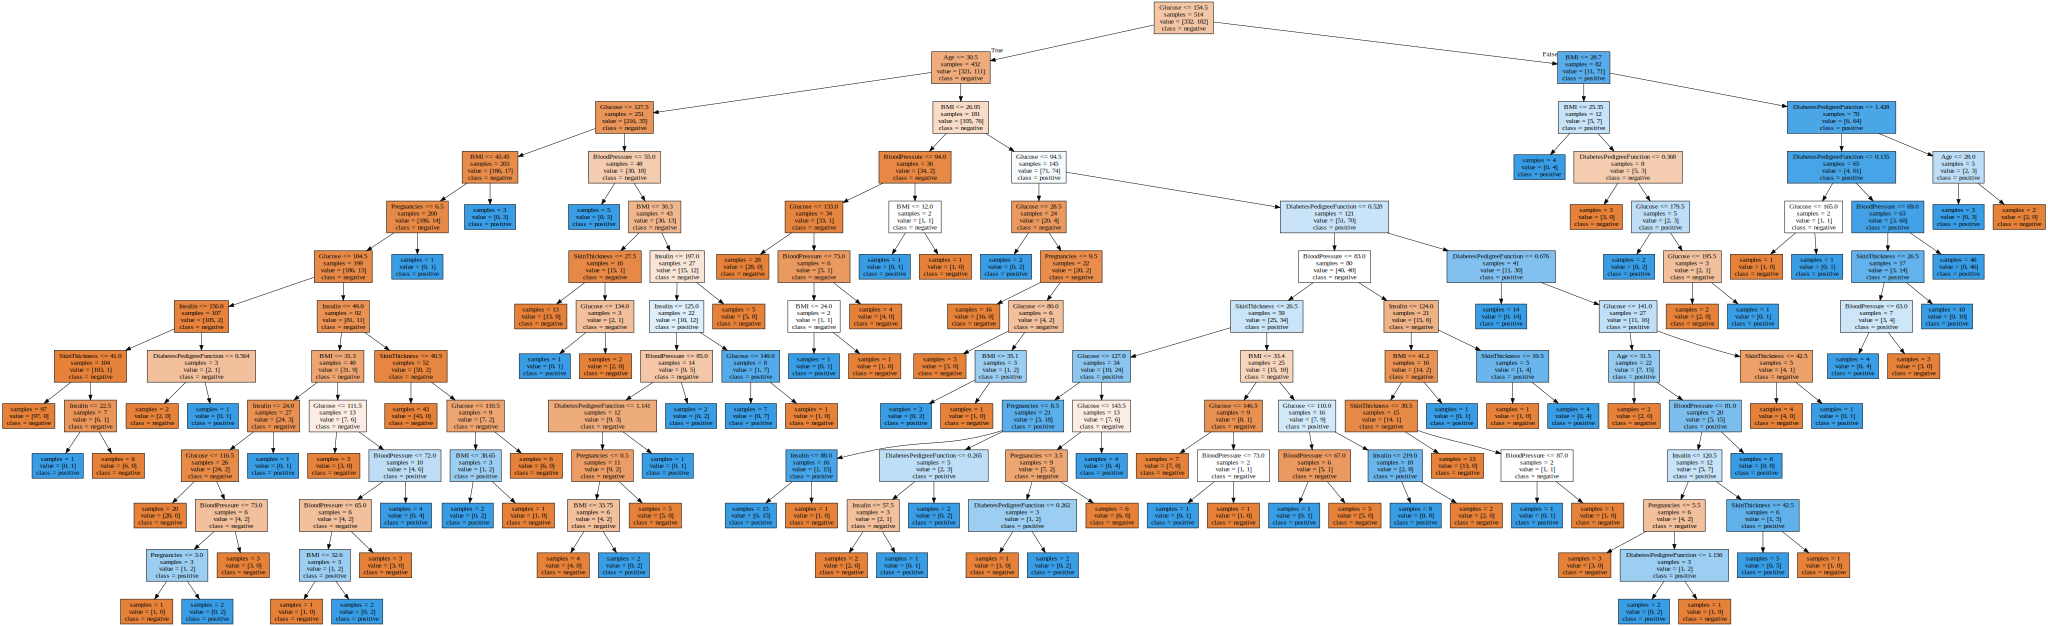

In [53]:
# instalar o graphviz: https://anaconda.org/anaconda/graphviz
# http://www.graphviz.org/Download_macos.php
# !pip install graphviz

import graphviz
from IPython.display import set_matplotlib_formats, display

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))